In [1]:
from torch.utils.data import DataLoader, TensorDataset
import torch
from torch import Tensor
import numpy as np
import os
from src.utils.scaler import StandardScaler
from src.utils.helper import get_dataloader

In [14]:
cat_data = np.load('./data/AIR_TINY/train.npz')
print(cat_data['x'].shape)
print(cat_data['y'].shape)
x = cat_data['x']
y = cat_data['y']
#x = x[...,11:15]
print(x[1,0,500,:])
#(batch, times=24, nodes=1085, channel=16)

(20, 24, 1085, 16)
(20, 24, 1085, 1)
[ 0.         -0.89523303 -0.31423315 -1.24844964 -0.57862961 -0.22132427
 -0.12640446 -0.31850623  0.52020981 -0.08787852  0.70779188  8.
  0.          1.          3.          0.        ]


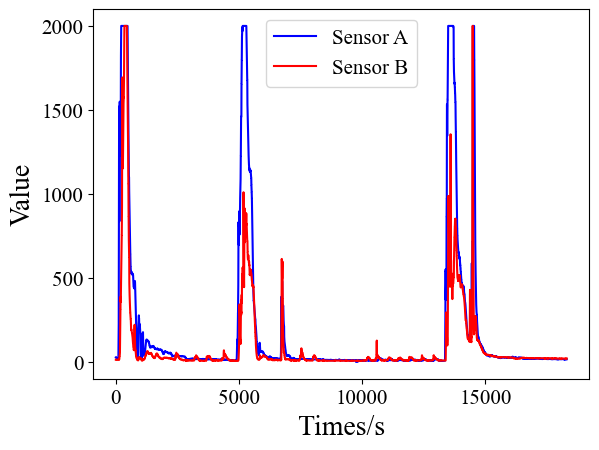

(18306, 9, 4) (18306, 9)
[[[1.35000000e-02 1.37931034e-01 7.57142857e-01 0.00000000e+00]
  [6.00000000e-03 1.03448276e-01 7.78571429e-01 3.05180438e-05]
  [1.30000000e-02 4.13793103e-01 4.71428571e-01 1.52590219e-05]
  [1.25000000e-02 2.75862069e-01 4.64285714e-01 1.52590219e-05]
  [1.65000000e-02 3.79310345e-01 3.78571429e-01 1.52590219e-05]
  [2.50000000e-02 3.44827586e-01 1.35714286e-01 1.52590219e-05]
  [1.85000000e-02 3.44827586e-01 8.07142857e-01 1.52590219e-05]
  [1.10000000e-02 3.10344828e-01 6.35714286e-01 1.52590219e-05]
  [1.25000000e-02 4.13793103e-01 6.64285714e-01 3.05180438e-05]]

 [[1.30000000e-02 1.37931034e-01 7.50000000e-01 0.00000000e+00]
  [6.00000000e-03 1.03448276e-01 7.71428571e-01 3.05180438e-05]
  [1.30000000e-02 4.13793103e-01 4.42857143e-01 1.52590219e-05]
  [1.25000000e-02 2.75862069e-01 4.85714286e-01 1.52590219e-05]
  [1.65000000e-02 3.79310345e-01 3.92857143e-01 0.00000000e+00]
  [2.50000000e-02 4.13793103e-01 1.21428571e-01 1.52590219e-05]
  [1.85000000

In [17]:
import numpy as np
import pandas as pd
from dateutil.parser import parse
from src.utils.scaler import StandardScaler, MinMaxScaler
from matplotlib import pyplot as plt

from sklearn import preprocessing

train_path = './data/my_data_train.csv'
csv_train = pd.read_csv(train_path,sep=",",encoding='gb2312',index_col="Time",parse_dates=True, date_parser=parse,header=0)
csv_train.sort_index(axis=0,ascending=True)
scaler = preprocessing.StandardScaler()
labels = []
labels.append(np.array(csv_train.loc[:,["A_PM2.5","C_PM2.5","E_PM2.5","G_PM2.5","H_PM2.5","L_PM2.5","N_PM2.5","P_PM2.5","R_PM2.5"]]))
labels.append(np.array(csv_train.loc[:,["A_Temperature","C_Temperature","E_Temperature","G_Temperature","H_Temperature","L_Temperature","N_Temperature","P_Temperature","R_Temperature"]]))
labels.append(np.array(csv_train.loc[:,["A_Humidity","C_Humidity","E_Humidity","G_Humidity","H_Humidity","L_Humidity","N_Humidity","P_Humidity","R_Humidity"]]))
labels.append(np.array(csv_train.loc[:,["A_TVOC","C_TVOC","E_TVOC","G_TVOC","H_TVOC","L_TVOC","N_TVOC","P_TVOC","R_TVOC"]]))
""" 
labels.append(scaler.fit_transform(np.array(csv_train.loc[:,["A_PM2.5","C_PM2.5","E_PM2.5","G_PM2.5","H_PM2.5","L_PM2.5","N_PM2.5","P_PM2.5","R_PM2.5"]])))
labels.append(scaler.fit_transform(np.array(csv_train.loc[:,["A_Temperature","C_Temperature","E_Temperature","G_Temperature","H_Temperature","L_Temperature","N_Temperature","P_Temperature","R_Temperature"]])))
labels.append(scaler.fit_transform(np.array(csv_train.loc[:,["A_Humidity","C_Humidity","E_Humidity","G_Humidity","H_Humidity","L_Humidity","N_Humidity","P_Humidity","R_Humidity"]])))
labels.append(scaler.fit_transform(np.array(csv_train.loc[:,["A_TVOC","C_TVOC","E_TVOC","G_TVOC","H_TVOC","L_TVOC","N_TVOC","P_TVOC","R_TVOC"]]))) """
labels = np.array(labels).transpose(1,2,0)
preds = np.array(csv_train.loc[:,["B_PM2.5","D_PM2.5","F_PM2.5","I_PM2.5","K_PM2.5","M_PM2.5","O_PM2.5","Q_PM2.5","S_PM2.5"]])
#preds = np.array(csv_train.loc[:,["A_PM2.5","C_PM2.5","E_PM2.5","G_PM2.5","H_PM2.5","L_PM2.5","N_PM2.5","P_PM2.5","R_PM2.5"]])
preds_scaler = preds


predict_data = np.array(csv_train.loc[:,"A_PM2.5"])
xx = np.array(range(0,predict_data.shape[0],1))


yy1 = predict_data

yy2 = np.array(csv_train.loc[:,"B_PM2.5"])
#print(xx.shape,yy.shape)
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams.update({"font.size":15})
plt.xlabel("Times/s",fontdict={'size':20})
plt.ylabel("Value",fontdict={'size':20})
plt.plot(xx,yy1,c='b',label="Sensor A")
plt.plot(xx,yy2,c='red',linestyle='-',label="Sensor B")
plt.legend()
plt.show()


#preds_scaler = scaler.fit_transform(preds)

preds_scaler = np.expand_dims(preds,axis=-1)
print(labels.shape, preds.shape)
split_ratio1 = int(labels.shape[0]//10)
ppp = preds_scaler[9*split_ratio1:]
lll = labels[9*split_ratio1:]

#data = np.array(csv_train.iloc[:,:])



output_dim = labels.shape[-1]
history = labels.copy()
meann =[]
stdd = []

scalers = []

for i in range(output_dim):
    """ scalers.append(MinMaxScaler(mean=history[...,i].mean(),
                                    std=history[...,i].std())) """
    scalers.append(MinMaxScaler(min=history[..., i].min(),
                                    max=history[..., i].max()))

for i in range(output_dim):
    history[...,i] = scalers[i].transform(history[...,i])
print(history[:20])
print("real_train shape: {}".format(history.shape))
np.save('./data/ft_data/history.npy',history)

time_len = preds_scaler.shape[0]
enstep = 24
destep = 24
step = 5
x = []
y = []


for i in range(enstep*step,time_len-destep):
    x.append(labels[i-enstep*step:i:step,:])
    y.append(preds_scaler[i:i+destep,:])
x = np.array(x)
y = np.array(y)
print(x.dtype,y.dtype)
""" x = x.reshape(x.shape[0],x.shape[1],-1,4)
y = y.reshape(y.shape[0],1,y.shape[1],y.shape[2]) """
print(x.shape)
print(y.shape)

split_ratio = int(x.shape[0]//10)
#train = [x[:9*split_ratio,...],y[:9*split_ratio,...]]
train = [x[:5*split_ratio,...],y[:5*split_ratio,...]]
valid = [x[5*split_ratio:6*split_ratio,...],y[5*split_ratio:6*split_ratio,...]]
test = [x[5*split_ratio:6*split_ratio,...],y[5*split_ratio:6*split_ratio,...]]
print(train[0].shape,train[1].shape)
print(valid[0].shape,valid[1].shape)
print(test[0].shape,test[1].shape)

np.savez('./data/ft_data_airformer/train.npz', x=train[0],y=train[1])
np.savez('./data/ft_data_airformer/val.npz', x=valid[0],y=valid[1])
np.savez('./data/ft_data_airformer/test.npz', x=test[0],y=test[1])





In [2]:
from sklearn import preprocessing
import numpy as np
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
import os
from src.utils.scaler import StandardScaler, MinMaxScaler


data_path = './data'
scaler = preprocessing.MinMaxScaler(feature_range=(50,200))
air_quality_data = pd.read_csv('{}/airquality.csv'.format(data_path), nrows=278023)

# remove data from 1022 that with lot of null data
air_quality_data = air_quality_data[air_quality_data['station_id'] != 1022]
columns = ['PM25_Concentration', 'PM10_Concentration',
            'NO2_Concentration', 'CO_Concentration',
            'O3_Concentration', 'SO2_Concentration']
# pivot the data
pivot_air_data = air_quality_data.pivot(index='time', columns='station_id', values=columns)
# linear interpolate to fill the loss value
pivot_air_data1 = pivot_air_data.interpolate(method='linear').dropna()

air_quality_data = pivot_air_data1.stack(level=1).reset_index().sort_values(by=['station_id', 'time'])
input_data = []
index = []
#print(np.array(air_quality_data[(air_quality_data['station_id'] == 1001)].loc[:,'PM25_Concentration'].values).shape)
for i in range(1001,1036):
    #input_data.append(np.array(air_quality_data[(air_quality_data.station_id == i)].drop(['station_id', 'time'], axis=1).values))
    if i!=1022:
        index.append(i)
        input_data.append(np.array(air_quality_data[(air_quality_data.station_id == i)].loc[:,'PM25_Concentration'].values))
input_data = np.array(input_data)
print(input_data.shape)
corr = np.corrcoef(input_data)
print(np.max(corr[0,1:]))
print(np.max(corr[1,2:]))
dataframe = pd.DataFrame(corr,index=index,columns=index)
#dataframe.to_csv('corr.csv')
labels = (dataframe.mean(axis=0).sort_values(ascending=False)).iloc[:8]
labels_index = np.array(labels.index)
preds_index = []
#print(dataframe[>0.8])

for i in labels_index:
    dt = dataframe.loc[i]
    dt_index = np.array(dt[(dt>0.8) & (dt<1)].sort_values(ascending=False).index)[:8]
    preds_index.extend(dt_index)

preds_index = np.array(preds_index).reshape(-1)
preds_index = np.sort(preds_index)
for i in range(len(labels_index)):
    preds_index = np.delete(preds_index,np.where(preds_index==labels_index[i]))
preds_index = np.unique(preds_index)


###交换，少对多
m = preds_index
preds_index = labels_index
labels_index = m
print("labels:",labels_index)
print("preds:",preds_index)

input_data = []
label_data = []
for i in preds_index:
#for i in range(1018,1036):
    #input_data.append(np.array(air_quality_data[(air_quality_data.station_id == i)].drop(['station_id', 'time'], axis=1).values))
    if i !=1022:
        input_data.append(scaler.fit_transform(np.array(air_quality_data[(air_quality_data.station_id == i)].drop(['station_id', 'time'], axis=1).values)))
for i in labels_index:
    if i !=1022:
        label_data.append(scaler.fit_transform(np.array(air_quality_data[(air_quality_data.station_id == i)].drop(['station_id', 'time','PM10_Concentration','NO2_Concentration', 'CO_Concentration',
            'O3_Concentration', 'SO2_Concentration'], axis=1).values)))

""" for i in range(1018,1036):
    #input_data.append(np.array(air_quality_data[(air_quality_data.station_id == i)].drop(['station_id', 'time'], axis=1).values))
    if i !=1022:
        input_data.append(scaler.fit_transform(np.array(air_quality_data[(air_quality_data.station_id == i)].drop(['station_id', 'time'], axis=1).values)))
for i in range(1001,1018):
    if i !=1022:
        label_data.append(scaler.fit_transform(np.array(air_quality_data[(air_quality_data.station_id == i)].drop(['station_id', 'time','PM10_Concentration','NO2_Concentration', 'CO_Concentration',
            'O3_Concentration', 'SO2_Concentration'], axis=1).values))) """

input_data = np.array(input_data)
label_data = np.array(label_data) 
""" scl2 =  preprocessing.StandardScaler(with_mean=np.mean(input_data[0]),with_std=np.std(input_data[0]))
print(input_data[0])
print(scl2.inverse_transform(input_data[0])) """
input_data = input_data.transpose(1,0,2)
label_data = label_data.transpose(1,0,2)
enstep = 12
destep = 6
steps = 1
x = []
y = []
y_=[]
tx = []
ty = []
split_rr = int(input_data.shape[0]//10)
train_input = input_data[:9*split_rr]
train_label = label_data[:9*split_rr]
time_train = train_input.shape[0]
test_input = input_data[9*split_rr:]
test_label = label_data[9*split_rr:]
time_test = test_input.shape[0]


output_dim = train_input.shape[-1]
history = train_input.copy()
meann =[]
stdd = []

scalers = []

for i in range(output_dim):
    """ scalers.append(MinMaxScaler(mean=history[...,i].mean(),
                                    std=history[...,i].std())) """
    scalers.append(MinMaxScaler(min=history[..., i].min(),
                                    max=history[..., i].max()))

for i in range(output_dim):
    history[...,i] = scalers[i].transform(history[...,i])
print(history[:20])
print("real_train shape: {}".format(history.shape))
np.save('./data/air_data/history.npy',history)



for k in range(1,steps+1):
    for i in range(enstep*k,time_train-destep*k):
        x.append(train_input[i+1-enstep*k:i+1:k,:])
        y.append(train_label[i:i+destep*k:k,:])
        y_.append(train_label[i+1-enstep*k:i+1:k,:])

for i in range(enstep,time_test-destep):
    tx.append(test_input[i-(enstep-1):i+1,:])
    ty.append(test_label[i:i+destep,:])
x = np.array(x)
y = np.array(y)
y_= np.array(y_)
tx = np.array(tx)
ty = np.array(ty)
print(x.shape,y.shape)
print(tx.shape,ty.shape)
train = [x,y,y_]
valid = [tx,ty]
test = [tx,ty]
np.savez('./data/air_data/train.npz', x=train[0],y=train[1],y_=train[2])
np.savez('./data/air_data/val.npz', x=test[0],y=test[1])
np.savez('./data/air_data/test.npz', x=test[0],y=test[1])

(34, 8414)
0.8657761232458082
0.9325192281622039
labels: [1002 1003 1004 1005 1007 1009 1014 1018]
preds: [1015 1006 1016 1011 1010 1020 1012 1013]
[[[0.22384937 0.14271357 0.20300088 0.08823529 0.30233885 0.05462185]
  [0.20041754 0.16281407 0.29680365 0.07692308 0.16759777 0.10852713]
  [0.21005386 0.20080402 0.42843373 0.0776699  0.15513393 0.04904406]
  [0.14975845 0.12190955 0.2510617  0.08333333 0.09016064 0.0853347 ]
  [0.14241002 0.11798995 0.08966626 0.06521739 0.30121639 0.07938199]
  [0.20289855 0.15175879 0.24543081 0.0625     0.23705722 0.03321033]
  [0.15859766 0.16080402 0.25       0.10752688 0.29041096 0.07526882]
  [0.19868996 0.1839196  0.21276596 0.10810811 0.27       0.06772908]]

 [[0.23849372 0.17788945 0.22065313 0.08823529 0.27096406 0.05462185]
  [0.22129436 0.16281407 0.31506849 0.07692308 0.13231403 0.10077519]
  [0.21723519 0.20170854 0.38698795 0.0776699  0.15039062 0.05029094]
  [0.15942029 0.12693467 0.27129653 0.08333333 0.06907631 0.07307103]
  [0.16588

In [43]:
import numpy as np
import pandas as pd
from dateutil.parser import parse

from sklearn import preprocessing

train_path = './data/ft3_data/1206实验_TVOC_集成传感器.csv'
test_path = './data/ft3_data/1207实验_TVOC_集成传感器.csv'
csv_train = pd.read_csv(test_path,sep=",",encoding='gb2312',parse_dates=True, date_parser=parse,header=0)
csv_train.sort_index(axis=0,ascending=True)
scaler = preprocessing.StandardScaler()
labels_train = []
#[厨房,餐厅,儿童房,客厅]
#[1144800890,1144800897,1144800904,1144800896]
labels_train.append(np.array(csv_train.loc[:,["1144800890_PM2.5","1144800897_PM2.5","1144800904_PM2.5","1144800896_PM2.5"]]))
#labels.append(np.array(csv_train.loc[:,["1144800890_CO2","1144800897_CO2","1144800904_CO2","1144800896_CO2"]]))
#labels.append(np.array(csv_train.loc[:,["1144800890_PM10","1144800897_PM10","1144800897_PM10","1144800897_PM10"]]))
labels_train = np.array(labels_train)
labels_train = np.array(labels_train).transpose(2,1,0)
labels_train = labels_train.reshape(labels_train.shape[0],labels_train.shape[1])
print(labels_train.shape)
corr = np.corrcoef(labels_train)
dataframe = pd.DataFrame(corr)
print(dataframe)

(4, 7862)
          0         1         2         3
0  1.000000  0.082745  0.060643  0.007659
1  0.082745  1.000000  0.736424  0.583055
2  0.060643  0.736424  1.000000  0.829713
3  0.007659  0.583055  0.829713  1.000000


In [40]:
import numpy as np
import pandas as pd
from dateutil.parser import parse

from sklearn import preprocessing

train_path = './data/ft3_data/1206实验_TVOC_集成传感器.csv'
test_path = './data/ft3_data/1207实验_TVOC_集成传感器.csv'
csv_train = pd.read_csv(train_path,sep=",",encoding='gb2312',parse_dates=True, date_parser=parse,header=0)
csv_train.sort_index(axis=0,ascending=True)
scaler = preprocessing.StandardScaler()
labels_train = []
#[厨房,餐厅,儿童房,客厅]
#[1144800890,1144800897,1144800904,1144800896]
labels_train.append(np.array(csv_train.loc[:,["1144800904_PM2.5"]]))
#labels.append(np.array(csv_train.loc[:,["1144800890_CO2","1144800897_CO2","1144800904_CO2","1144800896_CO2"]]))
#labels.append(np.array(csv_train.loc[:,["1144800890_PM10","1144800897_PM10","1144800897_PM10","1144800897_PM10"]]))
labels_train = np.array(labels_train)
labels_train = np.array(labels_train).transpose(1,2,0)
print(labels_train.shape)
""" corr = np.corrcoef(labels)
dataframe = pd.DataFrame(corr)
print(dataframe) """
preds_train = np.array(csv_train.loc[:,["1144800897_PM2.5","1144800896_PM2.5"]])
preds_train = np.expand_dims(preds_train,axis=-1)


csv_test = pd.read_csv(test_path,sep=",",encoding='gb2312',parse_dates=True, date_parser=parse,header=0)
csv_test.sort_index(axis=0,ascending=True)
labels_test = []
#[厨房,餐厅,儿童房,客厅]
#[1144800890,1144800897,1144800904,1144800896]
labels_test.append(np.array(csv_test.loc[:,["1144800904_PM2.5"]]))
#labels.append(np.array(csv_train.loc[:,["1144800890_CO2","1144800897_CO2","1144800904_CO2","1144800896_CO2"]]))
#labels.append(np.array(csv_train.loc[:,["1144800890_PM10","1144800897_PM10","1144800897_PM10","1144800897_PM10"]]))
labels_test = np.array(labels_test)
labels_test = np.array(labels_test).transpose(1,2,0)
print(labels_test.shape)
""" corr = np.corrcoef(labels)
dataframe = pd.DataFrame(corr)
print(dataframe) """
preds_test = np.array(csv_test.loc[:,["1144800897_PM2.5","1144800896_PM2.5"]])
preds_test = np.expand_dims(preds_test,axis=-1)

#data = np.array(csv_train.iloc[:,:])

time_len = preds_train.shape[0]
enstep = 20
destep = 5
steps = 5
x = []
y = []
tx = []
ty = []
split_rr = int(input_data.shape[0]//10)
train_input = labels_train
train_label = preds_train
time_train = train_input.shape[0]
test_input = labels_test
test_label = preds_test
time_test = test_input.shape[0]
for k in range(1,steps+1):
    for i in range(enstep*k,time_train-destep*k):
        x.append(train_input[i-enstep*k:i:k,:])
        y.append(train_label[i:i+destep*k:k,:])

for i in range(enstep,time_test-destep):
    tx.append(test_input[i-enstep:i,:])
    ty.append(test_label[i:i+destep,:])
x = np.array(x)
y = np.array(y)
tx = np.array(tx)
ty = np.array(ty)
print(x.shape,y.shape)
print(tx.shape,ty.shape)
train = [x,y]
valid = [tx,ty]
test = [tx,ty]

np.savez('./data/ft3_data/train.npz', x=train[0],y=train[1])
np.savez('./data/ft3_data/val.npz', x=valid[0],y=valid[1])
np.savez('./data/ft3_data/test.npz', x=test[0],y=test[1])

(14821, 3, 1)
(7862, 3, 1)
(147495, 12, 3, 1) (147495, 1, 2, 1)
(7849, 12, 3, 1) (7849, 1, 2, 1)


In [32]:
import numpy as np
import pandas as pd
from dateutil.parser import parse

from sklearn import preprocessing

train_path = './data/ft3_data/1206实验_TVOC_集成传感器.csv'
test_path = './data/ft3_data/1207实验_TVOC_集成传感器.csv'
csv_train = pd.read_csv(train_path,sep=",",encoding='gb2312',parse_dates=True, date_parser=parse,header=0)
csv_train.sort_index(axis=0,ascending=True)
scaler = preprocessing.StandardScaler()
labels_train = []
#[厨房,餐厅,儿童房,客厅]
#[1144800890,1144800897,1144800904,1144800896]
labels_train.append(np.array(csv_train.loc[:,["1144800904_PM2.5"]]))
#labels.append(np.array(csv_train.loc[:,["1144800890_CO2","1144800897_CO2","1144800904_CO2","1144800896_CO2"]]))
#labels.append(np.array(csv_train.loc[:,["1144800890_PM10","1144800897_PM10","1144800897_PM10","1144800897_PM10"]]))
labels_train = np.array(labels_train)
labels_train = np.array(labels_train).transpose(1,2,0)
print(labels_train.shape)
""" corr = np.corrcoef(labels)
dataframe = pd.DataFrame(corr)
print(dataframe) """
preds_train = np.array(csv_train.loc[:,["1144800896_PM2.5","1144800897_PM2.5"]])
preds_train = np.expand_dims(preds_train,axis=-1)


csv_test = pd.read_csv(test_path,sep=",",encoding='gb2312',parse_dates=True, date_parser=parse,header=0)
csv_test.sort_index(axis=0,ascending=True)
labels_test = []
#[厨房,餐厅,儿童房,客厅]
#[1144800890,1144800897,1144800904,1144800896]
labels_test.append(np.array(csv_test.loc[:,["1144800904_PM2.5"]]))
#labels.append(np.array(csv_train.loc[:,["1144800890_CO2","1144800897_CO2","1144800904_CO2","1144800896_CO2"]]))
#labels.append(np.array(csv_train.loc[:,["1144800890_PM10","1144800897_PM10","1144800897_PM10","1144800897_PM10"]]))
labels_test = np.array(labels_test)
labels_test = np.array(labels_test).transpose(1,2,0)
print(labels_test.shape)
""" corr = np.corrcoef(labels)
dataframe = pd.DataFrame(corr)
print(dataframe) """
preds_test = np.array(csv_test.loc[:,["1144800897_PM2.5","1144800896_PM2.5"]])
preds_test = np.expand_dims(preds_test,axis=-1)

#data = np.array(csv_train.iloc[:,:])

time_len = preds_train.shape[0]
enstep = 12
destep = 1
steps = 3
x = []
y = []
tx = []
ty = []
split_rr = int(labels_train.shape[0]//10)
train_input = labels_train[:9*split_rr]
train_label = preds_train[:9*split_rr]
time_train = train_input.shape[0]
test_input = labels_train[9*split_rr:]
test_label = preds_train[9*split_rr:]
time_test = test_input.shape[0]
for k in range(1,steps+1):
    for i in range(enstep*k,time_train-destep*k):
        x.append(train_input[i-enstep*k:i:k,:])
        y.append(train_label[i:i+destep*k:k,:])

for i in range(enstep,time_test-destep):
    tx.append(test_input[i-enstep:i,:])
    ty.append(test_label[i:i+destep,:])
x = np.array(x)
y = np.array(y)
tx = np.array(tx)
ty = np.array(ty)
print(x.shape,y.shape)
print(tx.shape,ty.shape)
train = [x,y]
valid = [tx,ty]
test = [tx,ty]

np.savez('./data/ft3_data/train.npz', x=train[0],y=train[1])
np.savez('./data/ft3_data/val.npz', x=valid[0],y=valid[1])
np.savez('./data/ft3_data/test.npz', x=test[0],y=test[1])

(14821, 1, 1)
(7862, 1, 1)
(39936, 12, 1, 1) (39936, 1, 2, 1)
(1470, 12, 1, 1) (1470, 1, 2, 1)
